# Import libraries

In [6]:
# Data science
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
## Encoding
from sklearn.preprocessing import LabelEncoder
## outliers
from scipy.stats import zscore
## normalization
from scipy.stats import shapiro, boxcox
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
## classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from itertools import product

# accuracy and error
from sklearn.metrics import accuracy_score, classification_report

# Data Overview

make sure to check on the file path and if the file is not uploaded, upload it then click on it and copy path then paste it

In [7]:
# Show all columns without truncation
pd.set_option('display.max_columns', None)
df = pd.read_csv("Milestone 2 Datasets/OnlineArticlesPopularity_Milestone2.csv")

In [8]:
df.shape

(38643, 46)

* Dataset consists of **```38643 rows```** and **```46 columns```**.

In [9]:
df.head()

,url,title,timedelta,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,channel type,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday,isWeekEnd,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,Article Popularity
0,http://mashable.com/2013/09/30/facebook-graph-...,facebook-graph-search-conversations,465,1011,0.469819,1.0,0.671210,20,5,1,0,4.918892,8,data_channel_is_bus,4,410.0,170.625000,14200,843300,240025.0,2312.944664,4115.600622,3263.987245,2200.0,27700.0,12833.33333,monday,No,0.899798,0.025015,0.025035,0.025050,0.025101,0.460128,0.087330,0.051434,0.025717,0.666667,0.333333,0.334834,0.033333,1.0,-0.295833,-1.0,-0.050,Above Average
1,http://mashable.com/2014/07/29/connie-britton-...,connie-britton-geena-rocero-social-good-summit,163,161,0.647799,1.0,0.747368,7,5,3,1,4.354037,10,data_channel_is_socmed,-1,2400.0,528.777778,0,843300,119913.1,0.000000,3926.846879,2340.798059,762.0,845.0,803.50000,tuesday,No,0.308255,0.631599,0.020042,0.020103,0.020001,0.425505,0.162121,0.068323,0.018634,0.785714,0.214286,0.291667,0.033333,0.5,-0.275000,-0.4,-0.125,Average
2,http://mashable.com/2013/08/09/how-to-prevent-...,how-to-prevent-porn-sexting,517,207,0.626214,1.0,0.807018,5,2,0,0,4.753623,4,data_channel_is_lifestyle,4,162.0,105.750000,4700,843300,265200.0,2045.600000,3542.000000,3094.843365,4700.0,4700.0,4700.00000,friday,No,0.379230,0.050005,0.050002,0.050082,0.470683,0.470696,0.190751,0.033816,0.009662,0.777778,0.222222,0.411395,0.214286,0.5,-0.300000,-0.4,-0.200,Average
3,http://mashable.com/2013/12/10/ed-norton-veriz...,ed-norton-verizon-droid-ad,394,252,0.581301,1.0,0.729730,5,3,1,0,4.861111,9,data_channel_is_socmed,-1,505.0,147.428571,0,843300,146200.0,0.000000,3795.019672,2470.921716,1700.0,1700.0,1700.00000,tuesday,No,0.221867,0.022232,0.408194,0.022304,0.325403,0.301515,0.201407,0.035714,0.000000,1.000000,0.000000,0.313300,0.033333,0.5,0.000000,0.0,0.000,Average
4,http://mashable.com/2014/09/12/oscar-pistorius...,oscar-pistorius-verdict-trial,117,463,0.515419,1.0,0.682657,2,2,1,0,4.980562,5,data_channel_is_world,-1,612.0,243.000000,2100,843300,214540.0,1137.600000,3483.491869,2404.728680,612.0,18200.0,9406.00000,saturday,Yes,0.040001,0.040000,0.839996,0.040000,0.040002,0.323407,-0.007080,0.028078,0.036717,0.433333,0.566667,0.265297,0.062500,0.5,-0.227941,-0.8,-0.100,Not Popular


In [10]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [11]:
print(df.columns.tolist())

['url', 'title', 'timedelta', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'channel type', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday', 'isWeekEnd', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'Article Popularity']


## Data Description

* (url) --> link of the online article
* (title) --> title of the online article
* (timedelta) --> This might represent the time difference between the publication date of the article and some other thing i don't know
* (n_tokens_content) --> This one represents the number of tokens (words or other meaningful units) in the content of the article.
* (n_unique_tokens) --> This may represent the ratio of unique tokens to the total number of tokens in the article.
* (n_non_stop_words) --> Number of non-stop words in the article.
* (n_non_stop_unique_tokens) --> Ratio of unique non-stop tokens to the total number of non-stop tokens.
* (num_hrefs) --> Number of hyperlinks in the article.
* (num_self_hrefs) --> Number of hyperlinks pointing to other pages within the same website/domain.
* (num_imgs) -->  Number of images included in the article.
* (num_videos) -->  Number of videos included in the article.
* (average_token_length) -->  Average length of tokens (words or other units) in the article.
* (num_keywords) -->  Number of keywords/meta-tags in the article.
* (channel type) --> Type of channel where the article was published (e.g., news, entertainment, sports).
* (kw_min_min) -->  Minimum number of times a keyword appeared among the documents' headlines.
* (kw_max_min) -->  Maximum number of times a keyword appeared among the documents' headlines.
* (kw_avg_min) -->  Average number of times a keyword appeared among the documents' headlines.
* (kw_min_max) -->  Minimum number of times a keyword appeared among the documents' content.
* (kw_max_max) -->  Maximum number of times a keyword appeared among the documents' content.
* (kw_avg_max) -->  Average number of times a keyword appeared among the documents' content.
* (kw_min_avg) -->  Minimum average keyword (keyword appears in the average article).
* (kw_max_avg) -->  Maximum average keyword (keyword appears in the average article).
* (kw_avg_avg) -->  Average average keyword (average number of times a keyword appears in an article).
* (self_reference_min_shares) -->  Minimum number of shares of articles referencing the article.
* (self_reference_max_shares) -->  Maximum number of shares of articles referencing the article.
* (self_reference_avg_sharess) -->  Average number of shares of articles referencing the article.
* (weekday) -->  Day of the week when the article was published.
* (isWeekEnd) -->  Indicates whether the publication date is a weekend or not.
* (LDA_00) to (LDA_04) --> Latent Dirichlet Allocation (LDA) topic features.
* (global_subjectivity) -->  Text subjectivity of the entire content.
* (global_sentiment_polarity) -->  Text sentiment polarity of the entire content.
* (global_rate_positive_words) -->  Rate of positive words in the content.
* (global_rate_negative_words) -->  Rate of negative words in the content.
* (rate_positive_words) -->  Rate of positive words among non-neutral tokens.
* (rate_negative_words) -->  Rate of negative words among non-neutral tokens.
* (avg_positive_polarity) -->  Average polarity of positive words.
* (min_positive_polarity) -->  Minimum polarity of positive words.
* (max_positive_polarity) -->  Maximum polarity of positive words.
* (avg_negative_polarity) -->  Average polarity of negative words.
* (min_negative_polarity) -->  Minimum polarity of negative words.
* (max_negative_polarity) -->  Maximum polarity of negative words.
* (Article Popularity) -->  Popularity of the Article.

### LDA columns
1. LDA is a generative statistical model that allows sets of observations to be explained by unobserved groups or topics. In the context of text analysis, LDA assumes that each document in a collection is a mixture of various topics, and each word in the document is attributable to one of the document's topics.
2. LDA_00 to LDA_04: These columns represent the probabilities that a given article belongs to each of the five topics extracted by the LDA model. Each value in these columns represents the strength of association between the article and a particular topic. The sum of these probabilities across all topics for a given article should equal 1.
3. For example, if an article has the following LDA probabilities:
* LDA_00: 0.2
* LDA_01: 0.5
* LDA_02: 0.1
* LDA_03: 0.15
* LDA_04: 0.05  
-- It suggests that the article has the highest probability of belonging to Topic 1 (LDA_01), followed by Topic 0 (LDA_00), and so on.

In [12]:
df.dtypes

url                            object
title                          object
timedelta                       int64
n_tokens_content                int64
n_unique_tokens               float64
n_non_stop_words              float64
n_non_stop_unique_tokens      float64
num_hrefs                       int64
num_self_hrefs                  int64
num_imgs                        int64
num_videos                      int64
average_token_length          float64
num_keywords                    int64
channel type                   object
kw_min_min                      int64
kw_max_min                    float64
kw_avg_min                    float64
kw_min_max                      int64
kw_max_max                      int64
kw_avg_max                    float64
kw_min_avg                    float64
kw_max_avg                    float64
kw_avg_avg                    float64
self_reference_min_shares     float64
self_reference_max_shares     float64
self_reference_avg_sharess    float64
weekday     

colclusion: data types is good except for the object columns there is no column type that is wrong

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38643 entries, 0 to 38642
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         38643 non-null  object 
 1   title                       38643 non-null  object 
 2   timedelta                   38643 non-null  int64  
 3   n_tokens_content            38643 non-null  int64  
 4   n_unique_tokens             38643 non-null  float64
 5   n_non_stop_words            38643 non-null  float64
 6   n_non_stop_unique_tokens    38643 non-null  float64
 7   num_hrefs                   38643 non-null  int64  
 8   num_self_hrefs              38643 non-null  int64  
 9   num_imgs                    38643 non-null  int64  
 10  num_videos                  38643 non-null  int64  
 11  average_token_length        38643 non-null  float64
 12  num_keywords                38643 non-null  int64  
 13  channel type                386

we colclude that:
* there is 5 columns needed to be encoded -> ('url', 'title', 'channel type', 'weekday', 'isWeekEnd')
* there is no nulls in the dataset

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,38643.0,354.594726,214.119175,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_content,38643.0,547.139611,471.285578,0.00000,247.000000,410.000000,717.000000,8474.000000
n_unique_tokens,38643.0,0.548412,3.565953,0.00000,0.470709,0.539130,0.608302,701.000000
n_non_stop_words,38643.0,0.996972,5.298498,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,38643.0,0.689356,3.306746,0.00000,0.625581,0.690411,0.754286,650.000000
num_hrefs,38643.0,10.891390,11.332647,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,38643.0,3.296250,3.854513,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,38643.0,4.539218,8.308654,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,38643.0,1.256321,4.131928,0.00000,0.000000,0.000000,1.000000,91.000000
average_token_length,38643.0,4.547656,0.846581,0.00000,4.478383,4.664407,4.855263,8.041534


## Unique values

In [15]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64','float64','int32']).columns.tolist()

In [16]:
for c in cat_cols:
    print(f"{c}'s Unique values: {df[c].unique()}")
    print("-------------\n")

url's Unique values: ['http://mashable.com/2013/09/30/facebook-graph-search-conversations/'
 'http://mashable.com/2014/07/29/connie-britton-geena-rocero-social-good-summit/'
 'http://mashable.com/2013/08/09/how-to-prevent-porn-sexting/' ...
 'http://mashable.com/2014/12/03/indiegogo-insurance-fee/'
 'http://mashable.com/2013/01/22/obama-sings-sexy-back/'
 'http://mashable.com/2013/11/07/space-burial-company/']
-------------

title's Unique values: ['facebook-graph-search-conversations'
 'connie-britton-geena-rocero-social-good-summit'
 'how-to-prevent-porn-sexting' ... 'indiegogo-insurance-fee'
 'obama-sings-sexy-back' 'space-burial-company']
-------------

channel type's Unique values: [' data_channel_is_bus' ' data_channel_is_socmed'
 ' data_channel_is_lifestyle' ' data_channel_is_world'
 ' data_channel_is_tech' '[]' ' data_channel_is_entertainment']
-------------

weekday's Unique values: ['monday' 'tuesday' 'friday' 'saturday' 'wednesday' 'thursday' 'sunday']
-------------

isWeekE

conclusion: there is empty list value in 'channel type' column, should by removed or changed

In [17]:
for c in num_cols:
    print(f"{c}'s Unique values: {df[c].unique()}")
    print("-------------\n")

timedelta's Unique values: [465 163 517 394 117 684 220 295 687 727  21 302 723  82 276 672 588 140
 139  46 333 433  88 101 254  31 705  48 183 731 209 504 575 538 408 676
 274 245 581 218 667 162 503 518 307 632 402 483  49 376 622 714 127 653
 469 314 199 476 486 134 240 695 664 492 178 347 450  77 252  63 316 482
 701 304 373 686  50 423 339  91  20 675 702 709 628 317  52 288 167  74
 449 107 135 138 358 699 694 536 443 235  43 160 398 624 111 541 662 348
 491 335 154 352 212 365 462 602 721 312 713  44 680 534 289 525 122 246
 210 360 331 215 109 638 619 253  72 282 506 598 499 385 232 414 508 540
 130 361  38 631 601 535 409 280 724 393 258 161 729 586 121 229 639 403
 610 191  87  54  42 728 175 608 366 205 153  30  62 584  99 395 563 593
 468  97 604 658 168 251 682 612  45  14 548 422  29 470 407   9 213 475
 578 647 574 473 429 334  80 197 720 401 439 204 706 133  33 345 356 226
 132 635 458 128 108 616 533 463 176 211  28 618 231 367 561 437 293 678
 633  73 141 380 718 136

colclusion: there is some 0 values in some columns that need to be checked on

In [18]:
# def count_zeros(dataframe):
#     zero_count = {}
#     for column in dataframe.columns:
#         zero_count[column] = (dataframe[column] == 0).sum()
#     return zero_count

In [19]:
# zero_count = count_zeros(df)

# for column, count in zero_count.items():
#     print(f"Number of zeros in {column}: {count}")

conclusion -> there are alot of 0 values in 'kw_min_max' and 'kw_min_avg' cols

# Data Preprocessing

## Check for nulls

In [20]:
print(df.isnull().sum())

url                           0
title                         0
timedelta                     0
n_tokens_content              0
n_unique_tokens               0
n_non_stop_words              0
n_non_stop_unique_tokens      0
num_hrefs                     0
num_self_hrefs                0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
channel type                  0
kw_min_min                    0
kw_max_min                    0
kw_avg_min                    0
kw_min_max                    0
kw_max_max                    0
kw_avg_max                    0
kw_min_avg                    0
kw_max_avg                    0
kw_avg_avg                    0
self_reference_min_shares     0
self_reference_max_shares     0
self_reference_avg_sharess    0
weekday                       0
isWeekEnd                     0
LDA_00                        0
LDA_01                        0
LDA_02                        0
LDA_03  

## Check for duplicates

In [21]:
print(df.duplicated().sum())

0


## Scaling

In [22]:
df.describe()

,timedelta,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity
count,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000
mean,354.594726,547.139611,0.548412,0.996972,0.689356,10.891390,3.296250,4.539218,1.256321,4.547656,7.226044,26.088011,1156.202519,312.816936,13625.673291,752473.933183,259193.638914,1117.454576,5651.122275,3134.412244,3951.234167,10306.556059,6358.404813,0.184760,0.141320,0.216204,0.223535,0.234156,0.443244,0.119350,0.039631,0.016605,0.682189,0.287715,0.353707,0.095275,0.756910,-0.259458,-0.521957,-0.107384
std,214.119175,471.285578,3.565953,5.298498,3.306746,11.332647,3.854513,8.308654,4.131928,0.846581,1.909869,69.609183,3892.145609,626.353999,58031.453869,214363.025346,134996.371343,1137.291237,6076.435635,1315.974465,18996.051347,40768.485474,23588.414078,0.263097,0.219655,0.282227,0.295067,0.289245,0.116722,0.096870,0.017435,0.010835,0.190380,0.156116,0.104652,0.071234,0.247932,0.127709,0.290418,0.095167
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,164.000000,247.000000,0.470709,1.000000,0.625581,4.000000,1.000000,1.000000,0.000000,4.478383,6.000000,-1.000000,447.000000,141.833333,0.000000,843300.000000,172860.000000,0.000000,3562.101631,2381.603148,638.000000,1100.000000,982.666667,0.025051,0.025012,0.028571,0.027856,0.028574,0.396120,0.057736,0.028398,0.009615,0.600000,0.185185,0.306108,0.050000,0.600000,-0.328326,-0.700000,-0.125000
50%,339.000000,410.000000,0.539130,1.000000,0.690411,8.000000,3.000000,1.000000,0.000000,4.664407,7.000000,-1.000000,661.000000,235.714286,1400.000000,843300.000000,244528.571400,1024.692308,4352.333333,2869.842840,1200.000000,2800.000000,2200.000000,0.033388,0.033345,0.040004,0.040001,0.040845,0.453374,0.119187,0.039024,0.015326,0.710526,0.279412,0.358571,0.100000,0.800000,-0.253333,-0.500000,-0.100000
75%,542.000000,717.000000,0.608302,1.000000,0.754286,14.000000,4.000000,4.000000,1.000000,4.855263,9.000000,4.000000,1000.000000,357.154762,7900.000000,843300.000000,330761.428550,2055.073003,6019.113106,3597.579050,2600.000000,8000.000000,5200.000000,0.241032,0.151034,0.334184,0.375093,0.399964,0.508242,0.177778,0.050279,0.021739,0.800000,0.384615,0.411274,0.100000,1.000000,-0.186735,-0.300000,-0.050000
max,731.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,10.000000,377.000000,298400.000000,42827.857140,843300.000000,843300.000000,843300.000000,3613.039820,298400.000000,43567.659950,843300.000000,843300.000000,843300.000000,0.926994,0.925947,0.919999,0.926534,0.927191,1.000000,0.727841,0.155488,0.184932,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000

In [23]:
scaler = MinMaxScaler()

numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [24]:
df.describe()

,timedelta,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity
count,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000
mean,0.479384,0.064567,0.000782,0.000957,0.001061,0.035827,0.028416,0.035463,0.013806,0.565521,0.691783,0.071661,0.003875,0.007327,0.016158,0.892297,0.307356,0.309475,0.018938,0.071944,0.004685,0.012222,0.007540,0.199310,0.152622,0.235004,0.241259,0.252544,0.443244,0.457475,0.254884,0.089788,0.682189,0.287715,0.353707,0.095275,0.756910,0.740542,0.478043,0.892616
std,0.296154,0.055615,0.005087,0.005085,0.005087,0.037278,0.033229,0.064911,0.045406,0.105276,0.212208,0.184151,0.013043,0.014625,0.068815,0.254195,0.160081,0.314687,0.020363,0.030205,0.022526,0.048344,0.027972,0.283817,0.237222,0.306769,0.318463,0.311958,0.116722,0.086369,0.112130,0.058589,0.190380,0.156116,0.104652,0.071234,0.247932,0.127709,0.290418,0.095167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215768,0.029148,0.000671,0.000960,0.000962,0.013158,0.008621,0.007812,0.000000,0.556907,0.555556,0.000000,0.001498,0.003335,0.000000,1.000000,0.204980,0.000277,0.011937,0.054664,0.000757,0.001304,0.001165,0.027024,0.027013,0.031056,0.030065,0.030817,0.396120,0.402540,0.182635,0.051994,0.600000,0.185185,0.306108,0.050000,0.600000,0.671674,0.300000,0.875000
50%,0.457815,0.048383,0.000769,0.000960,0.001062,0.026316,0.025862,0.007812,0.000000,0.580039,0.666667,0.000000,0.002215,0.005527,0.001660,1.000000,0.289966,0.283808,0.014586,0.065871,0.001423,0.003320,0.002609,0.036018,0.036012,0.043482,0.043172,0.044052,0.453374,0.457330,0.250980,0.082872,0.710526,0.279412,0.358571,0.100000,0.800000,0.746667,0.500000,0.900000
75%,0.738589,0.084612,0.000868,0.000960,0.001160,0.046053,0.034483,0.031250,0.010989,0.603773,0.888889,0.013228,0.003351,0.008362,0.009368,1.000000,0.392223,0.568913,0.020171,0.082575,0.003083,0.009487,0.006166,0.260015,0.163113,0.363244,0.404834,0.431372,0.508242,0.509569,0.323365,0.117552,0.800000,0.384615,0.411274,0.100000,1.000000,0.813265,0.700000,0.950000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# df[numeric_columns] = df[numeric_columns].replace(0, df[numeric_columns].median())

## Encoding

In [26]:
# get columns with data type "string"
print(df.select_dtypes(include='object').columns)

Index(['url', 'title', 'channel type', 'weekday', 'isWeekEnd',
       'Article Popularity'],
      dtype='object')


### Ordinal encoding

#### weekday column

In [27]:
df['weekday'].unique().tolist()

['monday', 'tuesday', 'friday', 'saturday', 'wednesday', 'thursday', 'sunday']

In [28]:
# changing the days of the week to numeric values
day_mapping = {'saturday': 1, 'sunday': 2, 'monday': 3, 'tuesday': 4, 'wednesday': 5, 'thursday': 6, 'friday': 7 }
df['weekday'] = df['weekday'].map(day_mapping)

#### isWeekEnd column

In [29]:
df['isWeekEnd'].unique().tolist()

['No', 'Yes']

In [30]:
df['isWeekEnd'] = df['isWeekEnd'].map({'Yes': 1, 'No': 0})

#### channel type column

In [31]:
df['channel type'].unique().tolist()

[' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_lifestyle',
 ' data_channel_is_world',
 ' data_channel_is_tech',
 '[]',
 ' data_channel_is_entertainment']

In [32]:
(df['channel type'] == '[]').sum()

5960

In [33]:
# to get the mode of the column
print(df['channel type'].mode())

0     data_channel_is_world
Name: channel type, dtype: object


In [34]:
df['channel type'] = df['channel type'].replace('[]', df['channel type'].mode()[0])

In [35]:
channel_type_encoding = {
    ' data_channel_is_bus': 0,
    ' data_channel_is_socmed': 1,
    ' data_channel_is_lifestyle': 2,
    ' data_channel_is_world': 3,
    ' data_channel_is_tech': 4,
    ' data_channel_is_entertainment': 5
}

df['channel type'] = df['channel type'].map(channel_type_encoding)


#### Article popularity

In [69]:
df['Article Popularity'].unique().tolist()

[2, 3, 4, 1]

In [37]:
df['Article Popularity'] = df['Article Popularity'].map({'Very Popular': 1, 'Above Average': 2, 'Average': 3, 'Not Popular': 4 })

### label encoder

In [38]:
# initialize label encoder
encoder = LabelEncoder()

#### url column

In [39]:
# df['url'] = df['url'].astype('category').cat.codes
df['url'] = encoder.fit_transform(df['url'])

#### title column

In [40]:
df['title'] = encoder.fit_transform(df['title'])

## Outliers

### Checking for outliers

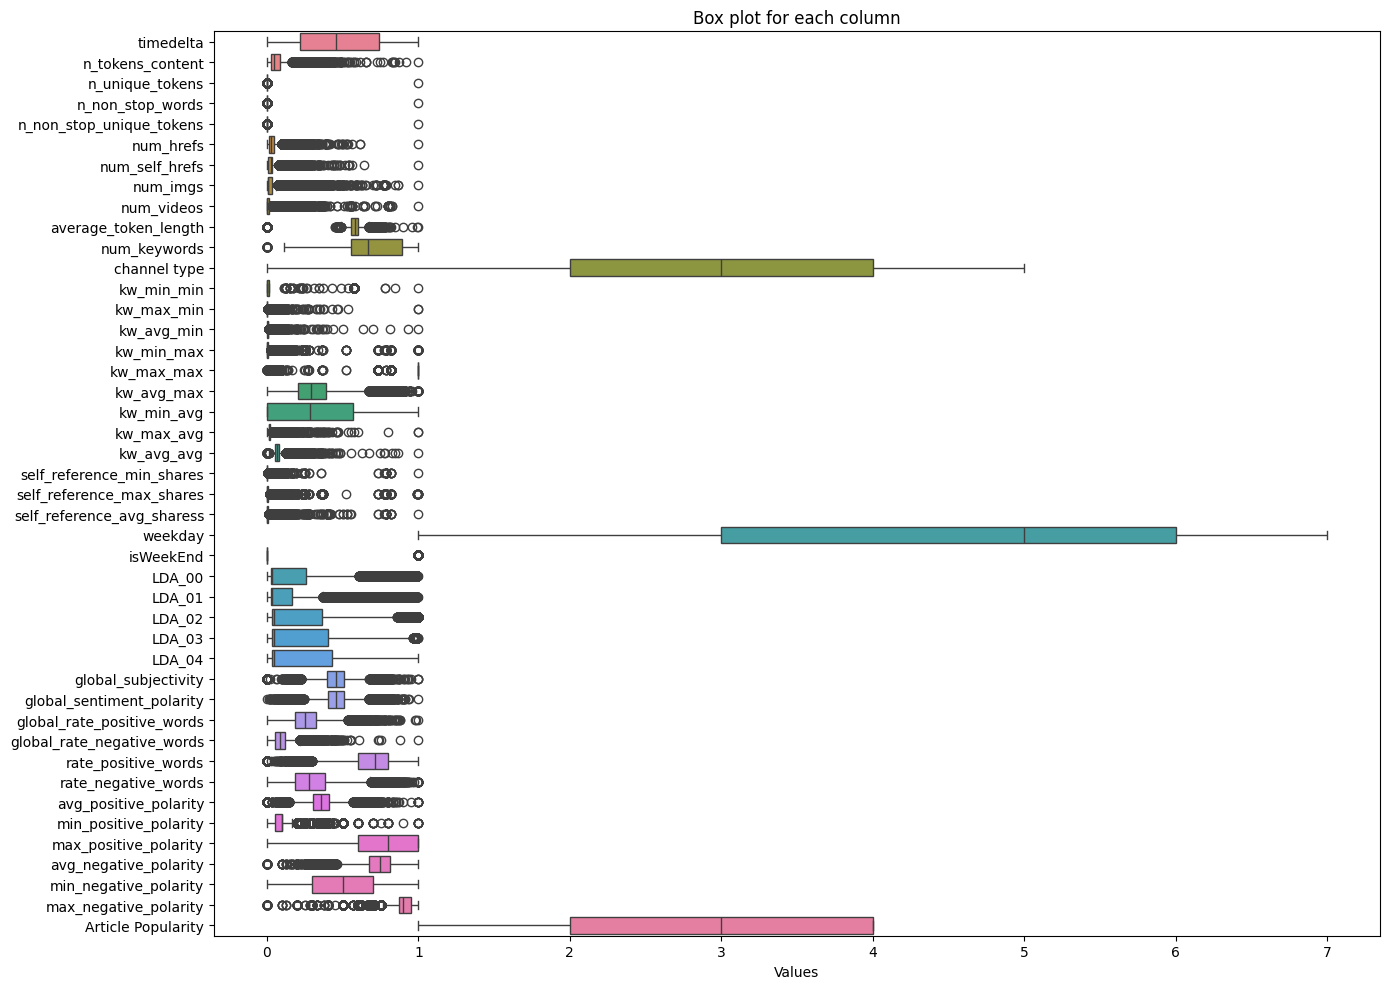

In [41]:
plt.figure(figsize=(14,10))
sns.boxplot(df.drop(['url', 'title'], axis = 1), orient='h')
plt.title('Box plot for each column')
plt.xlabel('Values')
plt.tight_layout()
plt.show()

In [42]:
# Function to identify outliers based on IQR
def find_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)

    return outliers

In [43]:
# list for columns contain outliers
outliers_cols = []

for column in df.columns:
    # Check if the column is numeric (assuming outliers are relevant for numeric data)

      outliers = find_outliers(df[column])
      num_outliers = outliers.sum()

      if num_outliers > 0:
        outliers_cols.append(column)

      print(f"Number of outliers in '{column}': {num_outliers}")

Number of outliers in 'url': 0
Number of outliers in 'title': 0
Number of outliers in 'timedelta': 0
Number of outliers in 'n_tokens_content': 1885
Number of outliers in 'n_unique_tokens': 1578
Number of outliers in 'n_non_stop_words': 2261
Number of outliers in 'n_non_stop_unique_tokens': 1699
Number of outliers in 'num_hrefs': 2123
Number of outliers in 'num_self_hrefs': 2041
Number of outliers in 'num_imgs': 7498
Number of outliers in 'num_videos': 2882
Number of outliers in 'average_token_length': 1640
Number of outliers in 'num_keywords': 51
Number of outliers in 'channel type': 0
Number of outliers in 'kw_min_min': 4556
Number of outliers in 'kw_max_min': 3567
Number of outliers in 'kw_avg_min': 2026
Number of outliers in 'kw_min_max': 4940
Number of outliers in 'kw_max_max': 9185
Number of outliers in 'kw_avg_max': 941
Number of outliers in 'kw_min_avg': 0
Number of outliers in 'kw_max_avg': 2326
Number of outliers in 'kw_avg_avg': 1598
Number of outliers in 'self_reference_min_

### Handling outliers

In [44]:
# df = df[(np.abs(zscore(df)) < 3).all(axis=1)]

In [45]:
# # Function to replace outliers with the median of the column
# def replace_outliers_with_median(dataframe):
#     for column in dataframe.columns:
#         if dataframe[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
#             Q1 = dataframe[column].quantile(0.25)
#             Q3 = dataframe[column].quantile(0.75)
#             IQR = Q3 - Q1
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR
#             median = dataframe[column].median()
#             # Replace outliers with the median
#             dataframe[column] = dataframe[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
#     return dataframe


In [46]:
def handle_outliers_iqr(data, columns):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)

        # Calculate IQR
        iqr = q3 - q1

        # Define lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Replace outliers with the boundaries of IQR
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

In [47]:
## Handling outliers using IQR
df = handle_outliers_iqr(df.copy(), outliers_cols)


In [48]:
# list for columns contain outliers
outliers_cols = []

for column in df.columns:
    # Check if the column is numeric (assuming outliers are relevant for numeric data)

      outliers = find_outliers(df[column])
      num_outliers = outliers.sum()

      if num_outliers > 0:
        outliers_cols.append(column)

      print(f"Number of outliers in '{column}': {num_outliers}")

Number of outliers in 'url': 0
Number of outliers in 'title': 0
Number of outliers in 'timedelta': 0
Number of outliers in 'n_tokens_content': 0
Number of outliers in 'n_unique_tokens': 0
Number of outliers in 'n_non_stop_words': 0
Number of outliers in 'n_non_stop_unique_tokens': 0
Number of outliers in 'num_hrefs': 0
Number of outliers in 'num_self_hrefs': 0
Number of outliers in 'num_imgs': 0
Number of outliers in 'num_videos': 0
Number of outliers in 'average_token_length': 0
Number of outliers in 'num_keywords': 0
Number of outliers in 'channel type': 0
Number of outliers in 'kw_min_min': 0
Number of outliers in 'kw_max_min': 0
Number of outliers in 'kw_avg_min': 0
Number of outliers in 'kw_min_max': 0
Number of outliers in 'kw_max_max': 0
Number of outliers in 'kw_avg_max': 0
Number of outliers in 'kw_min_avg': 0
Number of outliers in 'kw_max_avg': 0
Number of outliers in 'kw_avg_avg': 0
Number of outliers in 'self_reference_min_shares': 0
Number of outliers in 'self_reference_ma

## Normalizing

### check normalization

In [49]:
# list for cols that are not normal
not_normal_cols = []

def shapiro_test_normality(dataframe, alpha=0.05):
    i = 1
    for column in dataframe.select_dtypes(include=[np.number]).columns:
        data = dataframe[column]
        stat, p = shapiro(data)

        print(f'Column: {column}')
        print(f'  Statistics={stat}, p={p}')

        # Interpret the results
        if p > alpha:
            print(f'{i, column} appears to be normally distributed.')
        else:
            print(f'{i, column} does appear to be not normally distributed.')
            not_normal_cols.append(column)

        i += 1

In [50]:
shapiro_test_normality(df)

Column: url
  Statistics=0.9549289345741272, p=0.0
(1, 'url') does appear to be not normally distributed.
Column: title
  Statistics=0.9549289345741272, p=0.0
(2, 'title') does appear to be not normally distributed.
Column: timedelta
  Statistics=0.9453778862953186, p=0.0
(3, 'timedelta') does appear to be not normally distributed.
Column: n_tokens_content
  Statistics=0.9013776779174805, p=0.0
(4, 'n_tokens_content') does appear to be not normally distributed.
Column: n_unique_tokens
  Statistics=0.9893679022789001, p=5.605193857299268e-45
(5, 'n_unique_tokens') does appear to be not normally distributed.
Column: n_non_stop_words
  Statistics=0.8576233386993408, p=0.0
(6, 'n_non_stop_words') does appear to be not normally distributed.
Column: n_non_stop_unique_tokens
  Statistics=0.9843023419380188, p=0.0
(7, 'n_non_stop_unique_tokens') does appear to be not normally distributed.
Column: num_hrefs
  Statistics=0.875252366065979, p=0.0
(8, 'num_hrefs') does appear to be not normally di

C:\Users\Mohammed237\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Mohammed237\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


cols that have high normality -> kw_max_max, isWeekEnd

In [51]:
not_normal_cols

['url',
 'title',
 'timedelta',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'channel type',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'Article Popularity']

### handle skewness

In [52]:
# # Normalization
# scaler = StandardScaler()
# norm = scaler.fit_transform(df)
# df = pd.DataFrame(norm, columns= df.columns)

In [53]:
# scaler = MinMaxScaler()
# normalized_features = scaler.fit_transform(df)

# # Convert the array back to a DataFrame
# df = pd.DataFrame(normalized_features, columns=df.columns)

# # Check the new min and max
# print(df.min())
# print(df.max())

## Feature selection

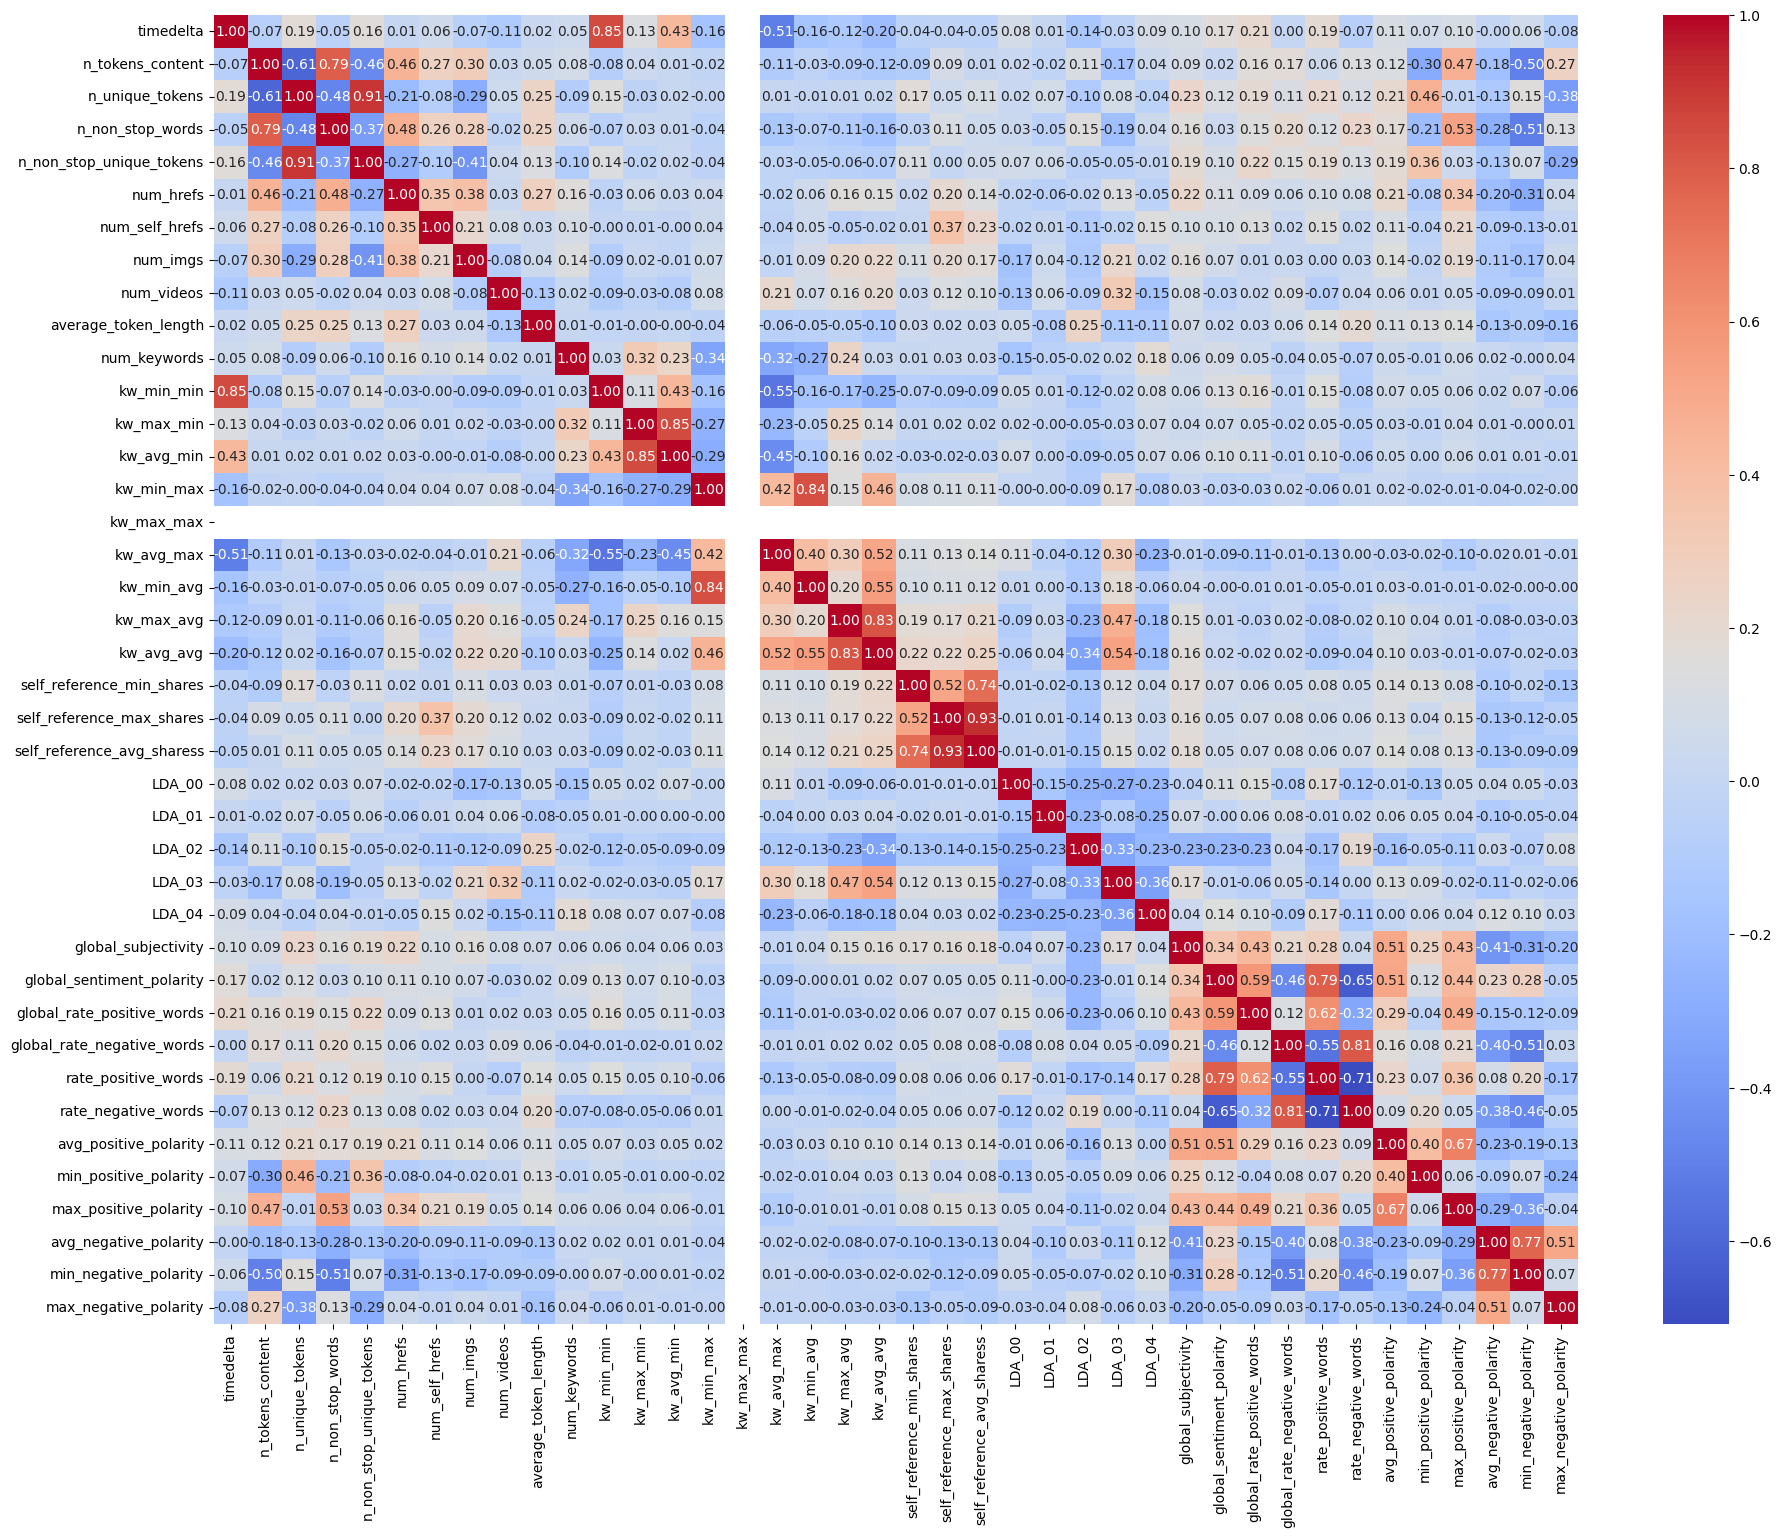

In [54]:

plt.figure(figsize=(22, 17))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [55]:
# target_corr = df[numeric_columns].corr()['shares'].sort_values(ascending=False)

# features = target_corr[abs(target_corr) >= 0.1].index.tolist()

# selected_features_corr = df[features].corr()

# # Plot to examine the correlation among selected features
# plt.figure(figsize=(8, 6))
# sns.heatmap(selected_features_corr, annot=True, fmt=".2f", cmap='coolwarm')
# plt.show()

In [56]:
# features.remove('shares')

In [57]:
# Perform ANOVA feature selection
selector = SelectKBest(score_func=f_classif, k='all')  # Select all features
X_selected = selector.fit_transform(df[cat_cols], df['Article Popularity'])

# Get the scores and p-values of the features
feature_scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to view the results
results = pd.DataFrame({'Feature': df[cat_cols].columns, 'Score': feature_scores, 'p-value': p_values})
results.sort_values(by='Score', ascending=False, inplace=True)

# Print the results
print(results)

              Feature       Score       p-value
5  Article Popularity         inf  0.000000e+00
3             weekday  108.269524  8.332795e-70
2        channel type   67.082352  2.937613e-43
0                 url   18.235852  8.076125e-12
1               title    1.406316  2.387893e-01
4           isWeekEnd         NaN           NaN


C:\Users\Mohammed237\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [4 5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Mohammed237\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\Mohammed237\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [58]:
selected_features = results[['Feature', 'Score', 'p-value']]
print(selected_features)

              Feature       Score       p-value
5  Article Popularity         inf  0.000000e+00
3             weekday  108.269524  8.332795e-70
2        channel type   67.082352  2.937613e-43
0                 url   18.235852  8.076125e-12
1               title    1.406316  2.387893e-01
4           isWeekEnd         NaN           NaN


conclustion -> col isWeekEnd has no effect on the data due to the null from anova

### Drop coloumns

In [59]:
df.columns.tolist()

['url',
 'title',
 'timedelta',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'channel type',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday',
 'isWeekEnd',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'Article Popularity']

In [60]:
#droping url and title columns as they has not use in modeling
df.drop(columns=[ 'url','title','isWeekEnd'], inplace=True)

### Select features

# Modeling

In [61]:
X = df.drop("Article Popularity", axis=1)
y = df['Article Popularity']

## Train and Test Split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression model

In [125]:
#penalty:   l1-->Lasso regularization , l2-->Ridge regularization,elasticnet-->combines both L1 and L2
lr_params = {'C': [10, 100, 150], 'penalty': ['l1', 'l2']}
lr = LogisticRegression(solver='liblinear')
lr_grid = GridSearchCV(lr, lr_params, cv=5)
lr_grid.fit(X_train, y_train)
lr_best = lr_grid.best_estimator_
print(lr_best)
# calc the accuracy
test_acc = lr_best.score(X_test, y_test)
print("acc of the test:", test_acc*100)

LogisticRegression(C=150, penalty='l1', solver='liblinear')
acc of the test: 45.67214387372234


best hyperparameter: *`c`* -> **``10``**, *`penalty`* -> **``11``**, *`solver`* -> **``liblinear``**

## SVM model

In [ ]:
# Define the parameter grid
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [ 0.1, 0.01, 0.001],
    'kernel': ['linear']
}

# Calculate the total number of combinations and estimated time
C_values = svm_params['C']
gamma_values = svm_params['gamma']
kernel_values = svm_params['kernel']
total_combinations = len(list(product(C_values, gamma_values, kernel_values)))
print("Total number of combinations:", total_combinations)
num_folds = 5
total_fits = total_combinations * num_folds
print("Total number of fits:", total_fits)

# svm model
svm = SVC()
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_
print("Best SVM Estimator:", svm_best)

## KNN model

In [121]:
# params of grid search
#'uniform': All points in each neighborhood are weighted equally
#'distance':Closer neighbors of a query point will have a greater influence than farther neighbors
knn_params = {'n_neighbors': [8,10,15,25], 'weights': ['uniform', 'distance']}
# to calculate the fits and estimated time for grid search
n_neighbors_values = knn_params['n_neighbors']
weights_values = knn_params['weights']
total_combinations = len(list(product(n_neighbors_values, weights_values)))
print("Total number of combinations:", total_combinations)
num_folds = 5
total_fits = total_combinations * num_folds
print("Total number of fits:", total_fits)
# call the model and grid search
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=num_folds)
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_
print("Best KNN Estimator:", knn_best)
# calc the accuracy
y_pred = knn_best.predict(X_test)
KNN_acc = accuracy_score(y_test, y_pred)
print("KNN_acc:", KNN_acc*100)

Total number of combinations: 8
Total number of fits: 40
Best KNN Estimator: KNeighborsClassifier(n_neighbors=25, weights='distance')
KNN_acc: 44.650019407426576


## Random forest model

Total number of combinations: 9
Total number of fits: 45
Best Random Forest Estimator: RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)


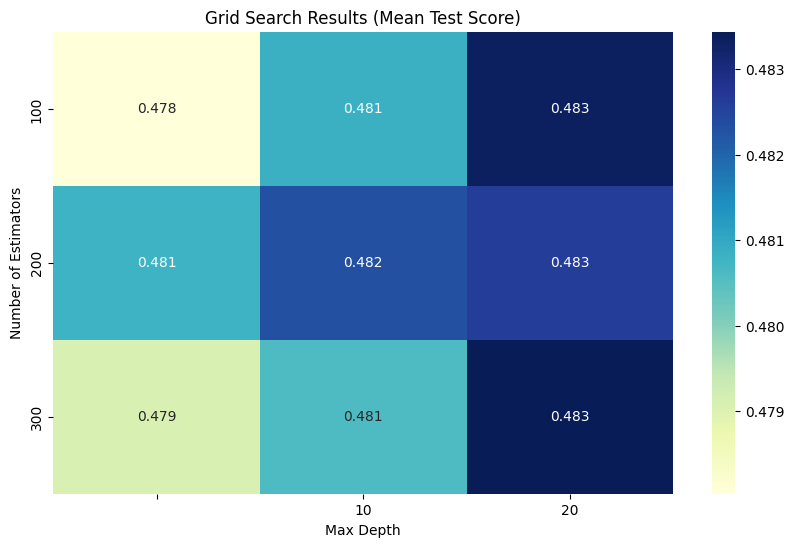

Random Forest Accuracy: 49.01022124466296


In [123]:
#'n_estimators': the number of decision trees in the random forest
# Define the parameter grid
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}

# Calculate the total number of combinations
n_estimators_values = rf_params['n_estimators']
max_depth_values = rf_params['max_depth']
total_combinations = len(list(product(n_estimators_values, max_depth_values)))
print("Total number of combinations:", total_combinations)
num_folds = 5
total_fits = total_combinations * num_folds
print("Total number of fits:", total_fits)

# grid search
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=num_folds)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
print("Best Random Forest Estimator:", rf_best)
# Extracting the results from the grid search
results = rf_grid.cv_results_
scores = results['mean_test_score'].reshape(len(n_estimators_values), len(max_depth_values))

# Plotting the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(scores, annot=True, fmt=".3f", cmap="YlGnBu", xticklabels=max_depth_values, yticklabels=n_estimators_values)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('Grid Search Results')
plt.show()
# Calc acc
y_pred = rf_best.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", rf_acc * 100)

## Gradient Boosting model

In [ ]:
# Define the parameter grid
gb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}

# Calculate the total number of combinations
n_estimators_values = gb_params['n_estimators']
max_depth_values = gb_params['max_depth']
total_combinations = len(list(product(n_estimators_values, max_depth_values)))
print("Total number of combinations:", total_combinations)
num_folds = 5
total_fits = total_combinations * num_folds
print("Total number of fits:", total_fits)

# Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=num_folds)
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_
print("Best Gradient Boosting Estimator:", gb_best)

## evaluation of models

### logistic regression

In [63]:
lr = LogisticRegression(C=150, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_pred_lr))

accuracy:  0.45672143873722343


### svm

In [64]:
svm = SVC(random_state=42, C=0.1, gamma=0.01, kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('accuracy: ',accuracy_score(y_test, y_pred_svm))

accuracy:  0.43200931556475614


### knn model

In [65]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')

# Train KNN model
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_knn)

K-Nearest Neighbors (KNN) Accuracy: 0.4465001940742658


### random forest model

In [66]:
# Create Random Forest classifier
rf = RandomForestClassifier(max_depth=20,n_estimators=300, random_state=42)

# Train Random Forest model
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.4901022124466296


### gradient boosting model

In [67]:
# Create Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=42,max_depth= 5,n_estimators=200)

# Train Gradient Boosting model
gb.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gb.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", accuracy_gb)


Gradient Boosting Accuracy: 0.4873851727260965


### cross validation on all models

In [ ]:
models = [rf, gb, svm, lr, knn]
for model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{model.__class__.__name__} Cross-Validation Accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

RandomForestClassifier Cross-Validation Accuracy: 0.4823 (±0.0030)
GradientBoostingClassifier Cross-Validation Accuracy: 0.4811 (±0.0039)
SVC Cross-Validation Accuracy: 0.4313 (±0.0001)
LogisticRegression Cross-Validation Accuracy: 0.4577 (±0.0019)
KNeighborsClassifier Cross-Validation Accuracy: 0.4142 (±0.0041)


In [ ]:
# models = [rf_best, gb_best, svm_best, lr_best, knn_best]
# for model in models:
#     model.fit(X_train, y_train)  # Fit the model on the training data
#     y_pred = model.predict(X_test)  # Predict on the test data
#     accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
#     print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")


## Voting classifier

In [ ]:
estimators = [
    ('gb', gb),
    ('svm', svm),
    ('lr', lr),
    ('knn', knn),
    ('rf', rf)
]

voting_clf = VotingClassifier(estimators=estimators, voting='hard')
voting_clf.fit(X_train, y_train)

# training and testing accuracy
train_accuracy_voting = accuracy_score(y_train, voting_clf.predict(X_train))
test_accuracy_voting = accuracy_score(y_test, voting_clf.predict(X_test))
print("Voting Classifier Training Accuracy:", train_accuracy_voting)
print("Voting Classifier Test Accuracy:", test_accuracy_voting)

# Print the classification report
print("Classification Report for Voting Classifier:")
print(classification_report(y_test, voting_clf.predict(X_test)))

Voting Classifier Training Accuracy: 0.644174160574497
Voting Classifier Test Accuracy: 0.4745762711864407
Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       446
           2       0.44      0.09      0.14      1744
           3       0.46      0.86      0.60      3339
           4       0.57      0.30      0.39      2200

    accuracy                           0.47      7729
   macro avg       0.37      0.31      0.28      7729
weighted avg       0.46      0.47      0.40      7729



## Stacking classifier

In [ ]:
estimators = [
    ('gb', gb),
    ('svm', svm),
    ('lr', lr),
    ('knn', knn),
    ('rf', rf)
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42))
stacking_clf.fit(X_train, y_train)

# training and testing accuracy
train_accuracy_stacking = accuracy_score(y_train, stacking_clf.predict(X_train))
test_accuracy_stacking = accuracy_score(y_test, stacking_clf.predict(X_test))
print("Stacking Classifier Training Accuracy:", train_accuracy_stacking)
print("Stacking Classifier Test Accuracy:", test_accuracy_stacking)

# Print the classification report
print("Classification Report for Stacking Classifier:")
print(classification_report(y_test, stacking_clf.predict(X_test)))

Stacking Classifier Training Accuracy: 0.6657824933687002
Stacking Classifier Test Accuracy: 0.4917841894164834
Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           1       0.67      0.00      0.01       446
           2       0.44      0.19      0.27      1744
           3       0.48      0.72      0.58      3339
           4       0.54      0.48      0.51      2200

    accuracy                           0.49      7729
   macro avg       0.53      0.35      0.34      7729
weighted avg       0.50      0.49      0.45      7729



# Save models to pickle file

In [68]:
import pickle

# make dictionary to store the models in then store the dic to pickle file
classification_models_dict = {
    'logistic_regression': lr,
    'SVM': svm,
    'Ramdom_Forest': rf,
    'KNN' : knn,
    'Gradient_boosting' : gb,

}

# Save the dictionary containing all classification models into a pickle file
with open('classification_models.pkl', 'wb') as f:
    pickle.dump(classification_models_dict, f)